In [1]:
import nltk
import pandas as pd
import numpy as np
import os
import re
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
os.chdir('F:\Board infinity\phonepe')

# Phonepe data

In [3]:
df_phonepe1 = pd.read_csv('phonepe_reviews.csv')
df_phonepe1[df_phonepe1.Source=='Twitter'].index
df_phonepe=df_phonepe1.drop(index=df_phonepe1[df_phonepe1.Source=='Twitter'].index)

In [4]:
df_phonepe.head()

,Source,Reviews
0,Google_Play_store,I would like suggest that for online GOLD buyi...
1,Google_Play_store,App always crashes while exploring the app. It...
2,Google_Play_store,My wallet has been deactivated somehow and tri...
3,Google_Play_store,It's good app but most of the times the transa...
4,Google_Play_store,After entering the debit card details as soon ...


In [5]:
def sub_processing(text):
    text = re.sub(r'[^ A-Z a-z .\',]+','',text)
    text = re.sub(r'[.]+','.',text)
    text = re.sub(r'\s+',' ',text)
    return text

In [6]:
df_phonepe_processed = df_phonepe.copy()
df_phonepe_processed['Reviews'] = df_phonepe['Reviews'].apply(sub_processing)

In [7]:
df_phonepe_processed.head()

,Source,Reviews
0,Google_Play_store,I would like suggest that for online GOLD buyi...
1,Google_Play_store,App always crashes while exploring the app. It...
2,Google_Play_store,My wallet has been deactivated somehow and tri...
3,Google_Play_store,It's good app but most of the times the transa...
4,Google_Play_store,After entering the debit card details as soon ...


In [8]:
nlp = spacy.load('en_core_web_lg')

In [10]:
def word_cloud(df): 
    comment_words = '' 
    stopwords = spacy.lang.en.stop_words.STOP_WORDS


    for val in df: 
        
        val = str(val) 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)):  
            tokens[i] = tokens[i].lower() 
      
        comment_words += " ".join(tokens)+" "
  
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

    return wordcloud


### we are going to check those reviews in which googlepe and paytm is mentioned. Then we will find whether it is poitive or negative

### 1. Google pay in phonepe reviews

In [12]:
df_google_pay = pd.DataFrame()
df_google_pay['Reviews'] = df_phonepe_processed['Reviews'].apply(lambda x: x.lower() if ('google' in x.lower())  else np.nan)
df_google_pay.dropna(inplace=True)

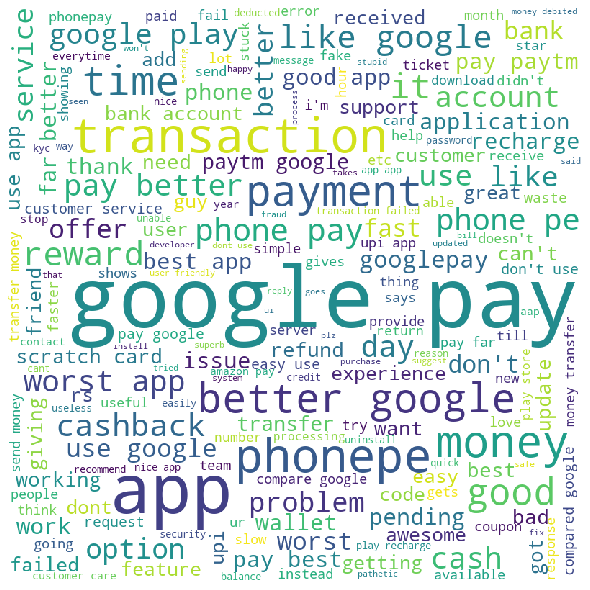

In [13]:
top_words_wc_temp = word_cloud(df_google_pay.Reviews).words_

##### Analysing sentiment

In [14]:
def pos_extractor(review):
    
    for  token in nlp(review):
        if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN':
            nouns.append(token.text)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'VERB':
            verbs.append(token.text)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADJ':
            adjs.append(token.text)

nouns = []
adjs = []
verbs = []

In [15]:
df_google_pay.Reviews.apply(pos_extractor)

1        None
11       None
29       None
41       None
48       None
         ... 
38083    None
38157    None
38173    None
38196    None
38331    None
Name: Reviews, Length: 1047, dtype: object

In [16]:
df_nouns = pd.DataFrame({'nouns':nouns})
df_nouns = df_nouns.nouns.apply(lambda x: x.lower())
df_nouns = pd.DataFrame(df_nouns)
top_100_nouns = df_nouns.nouns.value_counts()[0:100]
print(top_100_nouns)

pay            847
app            810
money          270
phone          234
transaction    163
              ... 
reply            9
success          9
credit           9
features         9
network          9
Name: nouns, Length: 100, dtype: int64


In [17]:
df_adjs = pd.DataFrame({'adjs':adjs})
df_adjs = df_adjs.adjs.apply(lambda x: x.lower())
df_adjs = pd.DataFrame(df_adjs)
top_100_adjs = df_adjs.adjs.value_counts()[0:100]
print(top_100_adjs)

better       294
good         165
worst        155
best         130
bad           65
            ... 
sudden         3
immediate      3
real           3
minimum        3
total          3
Name: adjs, Length: 100, dtype: int64


In [18]:
df_verbs = pd.DataFrame({'verbs':verbs})
df_verbs = df_verbs.verbs.apply(lambda x: x.lower())
df_verbs = pd.DataFrame(df_verbs)
top_100_verbs = df_verbs.verbs.value_counts()[0:100]
print(top_100_verbs)

pay         212
use         211
pending      57
failed       43
giving       42
           ... 
cashback      7
d             7
face          7
waiting       7
sent          7
Name: verbs, Length: 100, dtype: int64


In [19]:
## code to check the keywords which can enfluence the decision of the sentiment
## df_check is the temporary dataset to analyse the influenceing keyword and misclassification chances

#df_check = pd.DataFrame()
#df_check['Reviews'] = df_google_pay['Reviews'].apply(lambda x: x.lower() if ('unable' in x.lower())  else np.nan)
#df_check.dropna(inplace=True) 

#analyzer = SentimentIntensityAnalyzer()
#df_check['scores'] = df_check.Reviews.apply(analyzer.polarity_scores)
#df_check['compound_score_label'] = df_check.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )


# Analysis

In [20]:
analyzer = SentimentIntensityAnalyzer()
df_google_pay['scores'] = df_google_pay.Reviews.apply(analyzer.polarity_scores)
df_google_pay['compound_score_label'] = df_google_pay.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )
df_google_pay.compound_score_label.value_counts()

pos        676
neg        362
neutral      9
Name: compound_score_label, dtype: int64

In [21]:
## word 'better than phone' in reviews refers to google pay and paytm not phone pe.
## though it is a positive word, the review still can be negative in nature
## we removing 'better than phone' from all selected reviews.

In [22]:
def keyword_analyzer(x):
    if ('worst' in x) or ('pathetic' in x) or ('unable' in x) or ('slower than other' in x) or ('better than phone' in x) or ('best than phone' in x) or ('not better than google' in x) or ('waste than google' in x):
        return 'neg'
    elif ('not better than phone' in x) or ('better than google' in x) or ('best than google' in x) or ('good than google' in x) or ('faster than google' in x) or ('better than other' in x):
        return 'pos'

In [23]:
df_google_pay['temp'] = df_google_pay['Reviews'].apply(keyword_analyzer)

In [24]:
for index in df_google_pay.index:
    if df_google_pay['temp'][index] != None:
        df_google_pay.compound_score_label[index]=df_google_pay['temp'][index]

In [25]:
df_google_pay.compound_score_label.value_counts()

pos        637
neg        402
neutral      8
Name: compound_score_label, dtype: int64

In [27]:
# there were total 637 reviews of phonepe in which response for phonepe is positive against google pay 
# there were total 402 reviews of phonepe in which response for phonepe is negative against google pay

# there are total 8 neutral reviews, most of them are advertigements

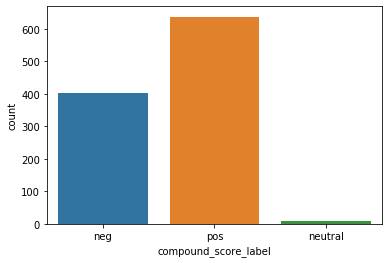

In [28]:
ax = sns.countplot(x='compound_score_label', data=df_google_pay)

# paytm in phonepe reviews

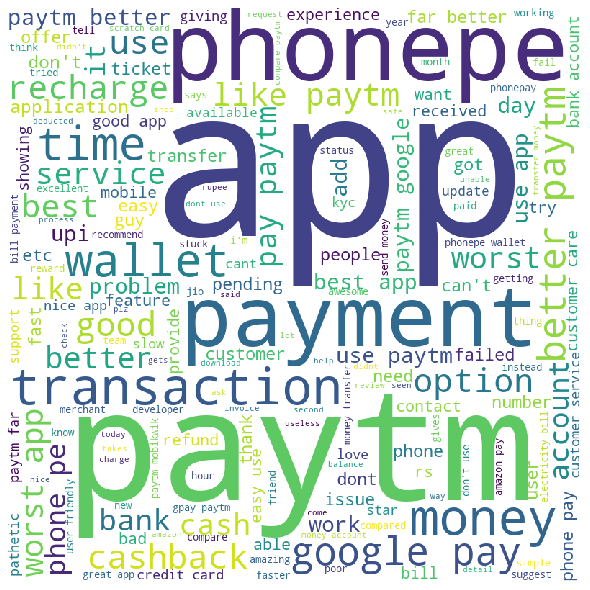

In [29]:
df_paytm = pd.DataFrame()
df_paytm['Reviews'] = df_phonepe_processed['Reviews'].apply(lambda x: x.lower() if ('paytm' in x.lower())  else np.nan)
df_paytm.dropna(inplace=True)

top_words_wc_temp = word_cloud(df_paytm.Reviews).words_

#### Analysis ofkeywords which caninfluence the sentiment

In [30]:
def pos_extractor(review):
    
    for  token in nlp(review):
        if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN':
            nouns.append(token.text)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'VERB':
            verbs.append(token.text)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADJ':
            adjs.append(token.text)

nouns = []
adjs = []
verbs = []

In [31]:
df_paytm.Reviews.apply(pos_extractor)

9        None
29       None
75       None
111      None
181      None
         ... 
38315    None
38326    None
38329    None
38332    None
38383    None
Name: Reviews, Length: 616, dtype: object

In [32]:
df_nouns = pd.DataFrame({'nouns':nouns})
df_nouns = df_nouns.nouns.apply(lambda x: x.lower())
df_nouns = pd.DataFrame(df_nouns)
top_100_nouns = df_nouns.nouns.value_counts()[0:100]
print(top_100_nouns)

app          589
money        188
paytm        148
payment      127
wallet       123
            ... 
issues         7
months         7
cashbacks      7
tickets        7
shop           6
Name: nouns, Length: 100, dtype: int64


In [34]:
df_adjs = pd.DataFrame({'adjs':adjs})
df_adjs = df_adjs.adjs.apply(lambda x: x.lower())
df_adjs = pd.DataFrame(df_adjs)
top_100_adjs = df_adjs.adjs.value_counts()[0:100]
print(top_100_adjs)

better       176
worst        116
best          97
good          94
paytm         55
            ... 
funny          2
financial      2
extra          2
smart          2
necessary      2
Name: adjs, Length: 100, dtype: int64


In [35]:
df_verbs = pd.DataFrame({'verbs':verbs})
df_verbs = df_verbs.verbs.apply(lambda x: x.lower())
df_verbs = pd.DataFrame(df_verbs)
top_100_verbs = df_verbs.verbs.value_counts()[0:100]
print(top_100_verbs)

use           168
pay            66
add            44
pending        38
need           30
             ... 
came            5
change          5
understand      5
offers          5
start           5
Name: verbs, Length: 100, dtype: int64


In [36]:
## code to check the keywords which can enfluence the decision of the sentiment
## df_check is the temporary dataset to analyse the influenceing keyword and misclassification chances

#df_check = pd.DataFrame()
#df_check['Reviews'] = df_google_pay['Reviews'].apply(lambda x: x.lower() if ('unable' in x.lower())  else np.nan)
#df_check.dropna(inplace=True) 

#analyzer = SentimentIntensityAnalyzer()
#df_check['scores'] = df_check.Reviews.apply(analyzer.polarity_scores)
#df_check['compound_score_label'] = df_check.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )


# Analysis

In [37]:
analyzer = SentimentIntensityAnalyzer()
df_paytm['scores'] = df_paytm.Reviews.apply(analyzer.polarity_scores)
df_paytm['compound_score_label'] = df_paytm.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )
df_paytm.compound_score_label.value_counts()

pos        411
neg        184
neutral     21
Name: compound_score_label, dtype: int64

In [38]:
def keyword_analyzer(x):
    if ('worst' in x) or ('pathetic' in x) or ('unable' in x) or ('slower than other' in x) or ('better than phone' in x) or ('best than phone' in x) or ('not better than paytm' in x) or ('waste than patm' in x):
        return 'neg'
    elif ('not better than phone' in x) or ('better than paytm' in x) or ('best than paytm' in x) or ('good than paytm' in x) or ('faster than paytm' in x) or ('better than other' in x):
        return 'pos'

In [39]:
df_paytm['temp'] = df_paytm['Reviews'].apply(keyword_analyzer)

In [40]:
for index in df_paytm.index:
    if df_paytm['temp'][index] != None:
        df_paytm.compound_score_label[index]=df_paytm['temp'][index]

In [41]:
df_paytm.drop(columns=['temp'],inplace=True)
df_paytm.compound_score_label.value_counts()

pos        381
neg        215
neutral     20
Name: compound_score_label, dtype: int64

In [42]:
# there were total 381 reviews of phonepe in which response for phonepe is positive against paytm 
# there were total 215 reviews of phonepe in which response for phonepe is negative against paytm

# there are total 20 neutral reviews, most of them are advertigements

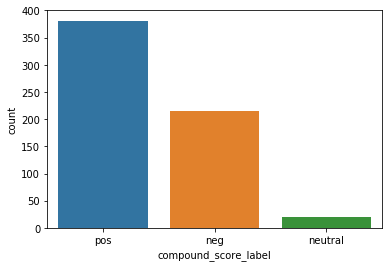

In [43]:
ax = sns.countplot(x='compound_score_label', data=df_paytm)

# phonepe reviews in google pay dataset

In [44]:
# Note
# a.  google pay positive review = phonepe nagative review
# b.  google pay negative review = phonepe positive review 

In [115]:
df_google_pay = pd.read_csv('google_pay_reviews.csv')
df_google_pay[df_google_pay.Source=='Twitter'].index
df_google_pay=df_google_pay.drop(index=df_google_pay[df_google_pay.Source=='Twitter'].index)
df_google_pay.head()

,Source,Reviews
0,Google_Play_store,I installed this app on my new Samsung phone i...
1,Google_Play_store,Enter Google Pay रेफरल कोड 👉(v 9 k 0 1 1) Abso...
2,Google_Play_store,G - Pay great रेफर 👉5 5 t 5 8 s👈 कोड डाले और 1...
3,Google_Play_store,"After the Google pay update, i get de register..."
4,Google_Play_store,G - pay रेफर कोड 👉5 5 t 5 8 s👈 डाले और 124rs ब...


In [116]:
def sub_processing(text):
    text = re.sub(r'[^ A-Z a-z .\',]+','',text)
    text = re.sub(r'[.]+','.',text)
    text = re.sub(r'\s+',' ',text)
    text = text.lower()
    return text

In [117]:
df_google_pay_processed = df_google_pay.copy()
df_google_pay_processed['Reviews'] = df_google_pay['Reviews'].apply(sub_processing)

In [118]:
df_google_pay_processed.head()

,Source,Reviews
0,Google_Play_store,i installed this app on my new samsung phone i...
1,Google_Play_store,enter google pay v k absolutely i love it i th...
2,Google_Play_store,"g pay great t s great money transfer app, app ..."
3,Google_Play_store,"after the google pay update, i get de register..."
4,Google_Play_store,g pay t s rs very awesome and genuine app. i l...


In [119]:
df_phonepe_in_gpay = pd.DataFrame()
df_phonepe_in_gpay['Reviews'] = df_google_pay_processed['Reviews'].apply(lambda x: x if ('phone' in x)  else np.nan)
df_phonepe_in_gpay.dropna(inplace=True)

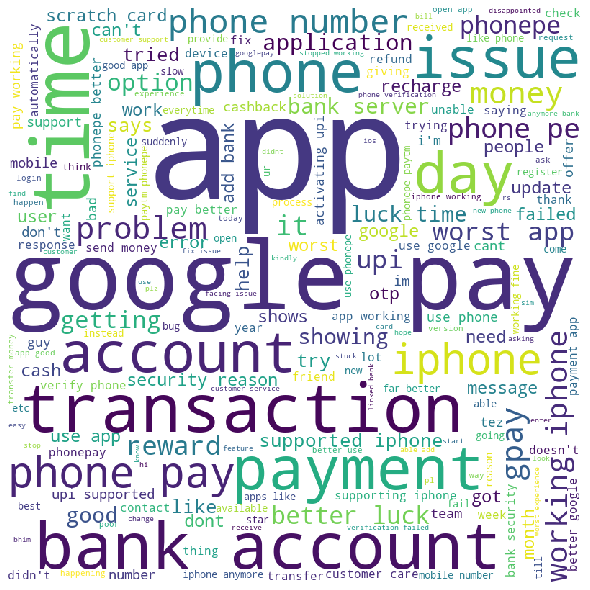

In [92]:
## word cloud analysis
top_words_wc_temp = word_cloud(df_phonepe_in_gpay.Reviews).words_

In [120]:
## pos analysis

def pos_extractor(review):
    
    for  token in nlp(review):
        if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN':
            nouns.append(token.text)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'VERB':
            verbs.append(token.text)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADJ':
            adjs.append(token.text)

nouns = []
adjs = []
verbs = []

In [121]:
df_phonepe_in_gpay.Reviews.apply(pos_extractor)

0        None
7        None
9        None
10       None
19       None
         ... 
42179    None
42189    None
42216    None
42223    None
42236    None
Name: Reviews, Length: 3614, dtype: object

In [122]:
df_phonepe_in_gpay_nouns = pd.DataFrame({'nouns':nouns})
df_phonepe_in_gpay_nouns = df_phonepe_in_gpay_nouns.nouns.apply(lambda x: x.lower())
df_phonepe_in_gpay_nouns = pd.DataFrame(df_phonepe_in_gpay_nouns)
top_100_nouns = df_phonepe_in_gpay_nouns.nouns.value_counts()[0:100]
print(top_100_nouns)

app          2619
phone        1973
pay          1336
bank         1194
account      1071
             ... 
weeks          40
kind           40
work           39
credit         39
customers      39
Name: nouns, Length: 100, dtype: int64


In [123]:
df_phonepe_in_gpay_adjs = pd.DataFrame({'adjs':adjs})
df_phonepe_in_gpay_adjs = df_phonepe_in_gpay_adjs.adjs.apply(lambda x: x.lower())
df_phonepe_in_gpay_adjs = pd.DataFrame(df_phonepe_in_gpay_adjs)
top_100_adjs = df_phonepe_in_gpay_adjs.adjs.value_counts()[0:100]
print(top_100_adjs)

better     662
worst      466
able       318
unable     299
good       286
          ... 
slower      10
valid       10
smart       10
invalid     10
non         10
Name: adjs, Length: 100, dtype: int64


In [124]:
df_phonepe_in_gpay_verbs = pd.DataFrame({'verbs':verbs})
df_phonepe_in_gpay_verbs = df_phonepe_in_gpay_verbs.verbs.apply(lambda x: x.lower())
df_phonepe_in_gpay_verbs = pd.DataFrame(df_phonepe_in_gpay_verbs)
top_100_verbs = df_phonepe_in_gpay_verbs.verbs.value_counts()[0:100]
print(top_100_verbs)

working      824
use          635
pay          467
getting      299
supported    294
            ... 
having        40
recharged     39
like          39
respond       37
verified      37
Name: verbs, Length: 100, dtype: int64


In [125]:
## code to check the keywords which can enfluence the decision of the sentiment
## df_check is the temporary dataset to analyse the influenceing keyword and misclassification chances

df_check = pd.DataFrame()
df_check['Reviews'] = df_phonepe_in_gpay['Reviews'].apply(lambda x: x.lower() if ('better than other' in x.lower())  else np.nan)
df_check.dropna(inplace=True) 

analyzer = SentimentIntensityAnalyzer()
df_check['scores'] = df_check.Reviews.apply(analyzer.polarity_scores)
df_check['compound_score_label'] = df_check.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )

In [126]:
## vader analyser
analyzer = SentimentIntensityAnalyzer()
df_phonepe_in_gpay['scores'] = df_phonepe_in_gpay.Reviews.apply(analyzer.polarity_scores)
df_phonepe_in_gpay['compound_score_label'] = df_phonepe_in_gpay.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )
df_phonepe_in_gpay.compound_score_label.value_counts()

neg        1740
pos        1587
neutral     287
Name: compound_score_label, dtype: int64

In [127]:
def keyword_analyzer(x):
    if ('worst' in x) or ('pathetic' in x) or ('unable' in x) or ('slower than other' in x) or ('better than phone' in x) or ('best than phone' in x) or ('not better than paytm' in x) or ('waste than patm' in x):
        return 'neg'
    elif ('not better than phone' in x) or ('better than paytm' in x) or ('best than paytm' in x) or ('good than paytm' in x) or ('faster than paytm' in x) or ('better than other' in x):
        return 'pos'

In [130]:
df_phonepe_in_gpay['temp'] = df_phonepe_in_gpay['Reviews'].apply(keyword_analyzer)

In [131]:
for index in df_phonepe_in_gpay.index:
    if df_phonepe_in_gpay['temp'][index] != None:
        df_phonepe_in_gpay.compound_score_label[index]=df_phonepe_in_gpay['temp'][index]

In [132]:
df_phonepe_in_gpay.drop(columns=['temp'],inplace=True)
df_phonepe_in_gpay.compound_score_label.value_counts()

neg        1974
pos        1381
neutral     259
Name: compound_score_label, dtype: int64

In [ ]:
# there are 1976 negative reviews about phonepe in paytm dataset
# there are 1382 positive reviews about phonepe in paytm dataset
# there are 262 neutral reviews.

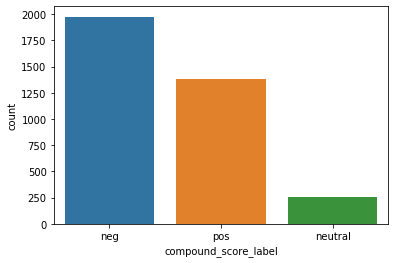

In [133]:
ax = sns.countplot(x='compound_score_label', data=df_phonepe_in_gpay)

# phonepe reviews in paytm dataset

In [64]:
# Note
# a.  paytm positive review = phonepe nagative review
# b.  paytm negative review = phonepe positive review 

In [68]:
df_paytm = pd.read_csv('paytm_reviews.csv')
df_paytm[df_paytm.Source=='Twitter'].index
df_paytm=df_paytm.drop(index=df_paytm[df_paytm.Source=='Twitter'].index)
df_paytm.head()

,Source,Reviews
0,Google_Play_store,"It was Good. But since few months, I was unabl..."
1,Google_Play_store,i found it very good in payment and other stuf...
2,Google_Play_store,so far so good Now I am reconsidering if I sho...
3,Google_Play_store,I have good experience with paytm transactions...
4,Google_Play_store,How will I use paytm if I have a wifi tablet. ...


In [70]:
def sub_processing(text):
    text = re.sub(r'[^ A-Z a-z .\',]+','',text)
    text = re.sub(r'[.]+','.',text)
    text = re.sub(r'\s+',' ',text)
    text = text.lower()
    return text

In [71]:
df_paytm_processed = df_paytm.copy()
df_paytm_processed['Reviews'] = df_paytm['Reviews'].apply(sub_processing)

In [72]:
df_paytm_processed.head()

,Source,Reviews
0,Google_Play_store,"it was good. but since few months, i was unabl..."
1,Google_Play_store,i found it very good in payment and other stuf...
2,Google_Play_store,so far so good now i am reconsidering if i sho...
3,Google_Play_store,i have good experience with paytm transactions...
4,Google_Play_store,how will i use paytm if i have a wifi tablet. ...


In [73]:
df_phonepe_in_paytm = pd.DataFrame()
df_phonepe_in_paytm['Reviews'] = df_paytm_processed['Reviews'].apply(lambda x: x if ('phone' in x)  else np.nan)
df_phonepe_in_paytm.dropna(inplace=True)

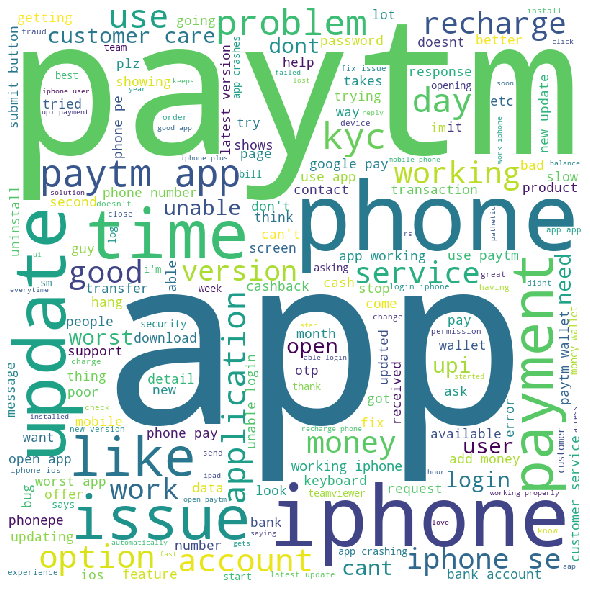

In [74]:
## word cloud analysis
top_words_wc_temp = word_cloud(df_phonepe_in_paytm.Reviews).words_

In [75]:
## pos analysis

def pos_extractor(review):
    
    for  token in nlp(review):
        if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN':
            nouns.append(token.text)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'VERB':
            verbs.append(token.text)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADJ':
            adjs.append(token.text)

nouns = []
adjs = []
verbs = []

In [76]:
df_phonepe_in_paytm.Reviews.apply(pos_extractor)

9        None
10       None
17       None
18       None
26       None
         ... 
25041    None
25171    None
25218    None
25320    None
25405    None
Name: Reviews, Length: 1722, dtype: object

In [79]:
df_phonepe_in_paytm_nouns = pd.DataFrame({'nouns':nouns})
df_phonepe_in_paytm_nouns = df_phonepe_in_paytm_nouns.nouns.apply(lambda x: x.lower())
df_phonepe_in_paytm_nouns = pd.DataFrame(df_phonepe_in_paytm_nouns)
top_100_nouns = df_phonepe_in_paytm_nouns.nouns.value_counts()[0:100]
print(top_100_nouns)

app        1553
phone       791
money       307
time        297
update      289
           ... 
tickets      21
device       21
options      21
request      21
rs           21
Name: nouns, Length: 100, dtype: int64


In [80]:
df_phonepe_in_paytm_adjs = pd.DataFrame({'adjs':adjs})
df_phonepe_in_paytm_adjs = df_phonepe_in_paytm_adjs.adjs.apply(lambda x: x.lower())
df_phonepe_in_paytm_adjs = pd.DataFrame(df_phonepe_in_paytm_adjs)
top_100_adjs = df_phonepe_in_paytm_adjs.adjs.value_counts()[0:100]
print(top_100_adjs)


worst         208
unable        186
able          179
paytm         176
good          137
             ... 
amazing         6
impossible      6
correct         6
heavier         6
indian          6
Name: adjs, Length: 100, dtype: int64


In [81]:
df_phonepe_in_paytm_verbs = pd.DataFrame({'verbs':verbs})
df_phonepe_in_paytm_verbs = df_phonepe_in_paytm_verbs.verbs.apply(lambda x: x.lower())
df_phonepe_in_paytm_verbs = pd.DataFrame(df_phonepe_in_paytm_verbs)
top_100_verbs = df_phonepe_in_paytm_verbs.verbs.value_counts()[0:100]
print(top_100_verbs)

working         313
use             285
open            167
login           146
fix             141
               ... 
asks             20
crashed          20
uninstalling     20
delete           20
close            19
Name: verbs, Length: 100, dtype: int64


In [82]:
# ## code to check the keywords which can enfluence the decision of the sentiment
# ## df_check is the temporary dataset to analyse the influenceing keyword and misclassification chances

# df_check = pd.DataFrame()
# df_check['Reviews'] = df_phonepe_in_paytm['Reviews'].apply(lambda x: x.lower() if ('better than other' in x.lower())  else np.nan)
# df_check.dropna(inplace=True) 

# analyzer = SentimentIntensityAnalyzer()
# df_check['scores'] = df_check.Reviews.apply(analyzer.polarity_scores)
# df_check['compound_score_label'] = df_check.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )


In [83]:
## vader analyser
analyzer = SentimentIntensityAnalyzer()
df_phonepe_in_paytm['scores'] = df_phonepe_in_paytm.Reviews.apply(analyzer.polarity_scores)
df_phonepe_in_paytm['compound_score_label'] = df_phonepe_in_paytm.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )
df_phonepe_in_paytm.compound_score_label.value_counts()


neg        815
pos        629
neutral    278
Name: compound_score_label, dtype: int64

In [84]:

def keyword_analyzer(x):
    if ('worst' in x) or ('pathetic' in x) or ('unable' in x) or ('slower than other' in x) or ('better than phone' in x) or ('best than phone' in x) or ('not better than google' in x) or ('waste than google' in x):
        return 'neg'
    elif ('not better than phone' in x) or ('better than google' in x) or ('best than google' in x) or ('good than google' in x) or ('faster than google' in x) or ('better than other' in x):
        return 'pos'


In [86]:
df_phonepe_in_paytm['temp'] = df_phonepe_in_paytm['Reviews'].apply(keyword_analyzer)

In [88]:
for index in df_phonepe_in_paytm.index:
    if df_phonepe_in_paytm['temp'][index] != None:
        df_phonepe_in_paytm.compound_score_label[index]=df_phonepe_in_paytm['temp'][index]

In [89]:
df_phonepe_in_paytm.drop(columns=['temp'],inplace=True)
df_phonepe_in_paytm.compound_score_label.value_counts()

neg        923
pos        552
neutral    247
Name: compound_score_label, dtype: int64

In [90]:
# there are 923 negative reviews about phonepe in paytm dataset
# there are 552 positive reviews about phonepe in paytm dataset
# there are 247 neutral reviews.

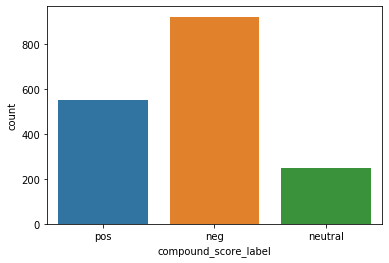

In [91]:
ax = sns.countplot(x='compound_score_label', data=df_phonepe_in_paytm)